In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Unzip the data
!unzip /content/gdrive/MyDrive/YouTube/dataAnalysisPlaylist/practical-statistics-for-data-scientists/data-society-used-cars-data.zip -d /content/

# Unmount the gdrive
drive.flush_and_unmount()

Archive:  /content/gdrive/MyDrive/YouTube/dataAnalysisPlaylist/practical-statistics-for-data-scientists/data-society-used-cars-data.zip
  inflating: /content/data-society-used-cars-data/datapackage.json  
  inflating: /content/data-society-used-cars-data/data/autos.csv  
  inflating: /content/data-society-used-cars-data/original/autos.csv  


In [ ]:
# Import the modules
import pandas as pd

# Import the data
# Source: https://data.world/data-society/used-cars-data
data = pd.read_csv("/content/data-society-used-cars-data/data/autos.csv")

In [ ]:
# Transposed describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearofregistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerps,371528.0,115.549477,1.921396e+02,0.0,70.0,105.0,150.0,2.000000e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthofregistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
postalcode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04


In [ ]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   datecrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offertype            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicletype          333659 non-null  object
 7   yearofregistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerps              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthofregistration  371528 non-null  int64 
 13  fueltype             338142 non-null  object
 14  brand                371528 non-null  object
 15  notrepaireddamage    299468 non-nu

In [ ]:
# Record the columns with the limited number of unique variables
rec = list()

# Unique value inspection for the categorical features
for col in data.select_dtypes(include="object").columns:
    # Declare the number of unique variables
    num_uniq = len(data.loc[:, col].unique())
    # Trace the column name with the unique number of variables
    print(col, num_uniq)
    # If the number of unique variables is below 10
    if num_uniq < 10:
        # Record it
        rec.append(col)

datecrawled 280500
name 233531
seller 2
offertype 2
abtest 2
vehicletype 9
gearbox 3
model 252
fueltype 8
brand 40
notrepaireddamage 3
datecreated 114
lastseen 182806


In [ ]:
# Zoom in for the columns with limited unique variables
for col in rec:
    # Trace the unique variables
    print(f"{col}: {data.loc[:, col].unique()}")

seller: ['privat' 'gewerblich']
offertype: ['Angebot' 'Gesuch']
abtest: ['test' 'control']
vehicletype: [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
gearbox: ['manuell' 'automatik' nan]
fueltype: ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
notrepaireddamage: [nan 'ja' 'nein']


In [ ]:
# Continuous variables
cont = ["price", "powerps", "kilometer"]
# Categorical variables
cat = ["abtest", "vehicletype", "gearbox", "fueltype"] # abtest for the following module

In [ ]:
# Move on with the selected columns
data = data.loc[:, [*cont, *cat]].copy()

In [ ]:
def calc_missing(df: pd.DataFrame) -> pd.DataFrame:
    """Returns the missing percentages of the given frame.

    Args:
        df (pd.DataFrame): The Dataframe. 

    Returns:
        pd.DataFrame: The missing percentages.
    """
    # Calculate the number of missing values
    missing = df.isnull().sum()
    # Calculate the missing percentages
    percent_missing = missing * 100 / len(df)
    # Create a frame with dict format
    missing_value_df = pd.DataFrame(
        {"num_missing": missing, "percent_missing": percent_missing}
    )
    # Round the percentage values
    missing_value_df = round(number=missing_value_df, ndigits=2)
    # Sort from highest to lowest
    missing_value_df.sort_values("percent_missing", inplace=True)
    # Return the missing value frame
    return missing_value_df


# Check the missing value portions of the training data
missing = calc_missing(df=data); missing

,num_missing,percent_missing
price,0,0.00
powerps,0,0.00
kilometer,0,0.00
abtest,0,0.00
gearbox,20209,5.44
fueltype,33386,8.99
vehicletype,37869,10.19


In [ ]:
# Fill the missing values with the most frequent variable
data = data.fillna(data.mode().iloc[0].to_dict())
# Trace the result
calc_missing(df=data)

,num_missing,percent_missing
price,0,0.0
powerps,0,0.0
kilometer,0,0.0
abtest,0,0.0
vehicletype,0,0.0
gearbox,0,0.0
fueltype,0,0.0


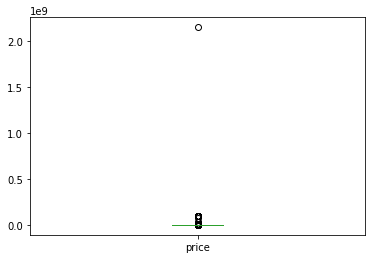

In [ ]:
# Get non-zero price variables
prices = data.loc[data.price > 0, "price"]
# Boxplot
prices.plot.box()

(-1.0, 20.0)

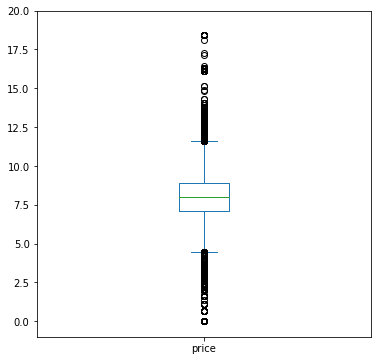

In [ ]:
# Import the modules
from numpy import log

# Take the log of the price values
log_prices = log(prices)
# Boxplot visualization
ax = log_prices.plot.box(figsize=(6, 6))
# Set the y-axis range
ax.set_ylim(ymin=-1, ymax=20)

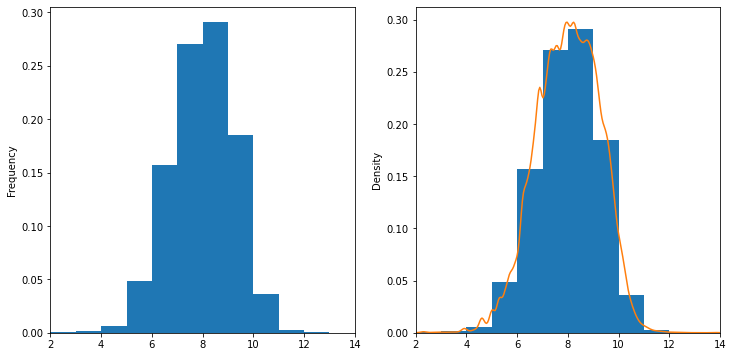

In [ ]:
# Import the modules
import matplotlib.pyplot as plt

# Multiple figures
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
# Histogram visualization
log_prices.plot.hist(density=True,
                     xlim=[2, 14],
                     bins=range(1, 15),
                     ax=axes[0]) # Plain hist
ax = log_prices.plot.hist(density=True,
                          xlim=[2, 14],
                          bins=range(1, 15),
                          ax=axes[1])
log_prices.plot.density(ax=ax) # w/ density function

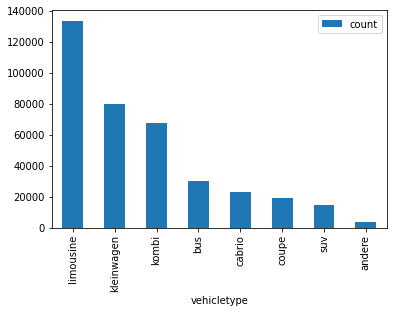

In [ ]:
# Value count representation based on the vehicle types
vt = data.loc[:, ["vehicletype"]].value_counts()\
                            .to_frame()\
                            .rename(columns={0: "count"})\
                            .reset_index()
# Bar chart visualization
vt.plot.bar(x="vehicletype", y="count")

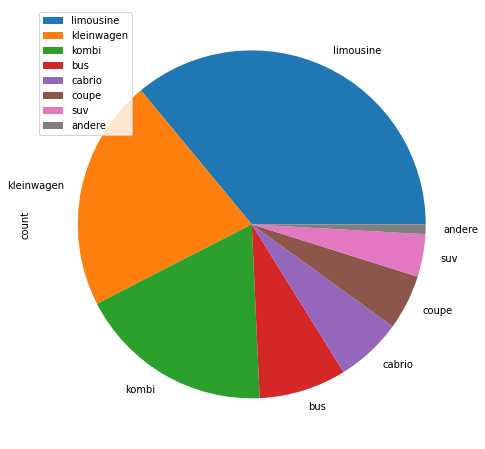

In [ ]:
# Pie plot
ax = vt.plot.pie(y="count",
            labels=vt.vehicletype,
            figsize=(8, 8))
# Legend location
ax.legend(loc="upper left")

In [ ]:
# Delete not needed objects
del vt

In [ ]:
# Take care of zero values before taking log of them

# Iterate through the continuous features
for c in cont:
    # Declare 0.1 instead of 0
    data.loc[data[c] == 0, c] = 0.1

In [ ]:
# Declare the log version of continuous variables
cont_log = {f"log_{c}": c for c in cont}

# Iterate through the log variables
for cl in cont_log.keys():
    # Create them
    data.loc[:, cl] = log(data.loc[:, cont_log[cl]].values)

data.loc[:, cont_log.keys()].sample(n=5)

,log_price,log_powerps,log_kilometer
261539,8.922658,4.234107,11.407565
313366,7.937017,4.672829,11.918391
146300,9.132379,4.941642,11.918391
92185,-2.302585,-2.302585,8.517193
128900,9.464983,4.804021,11.156251


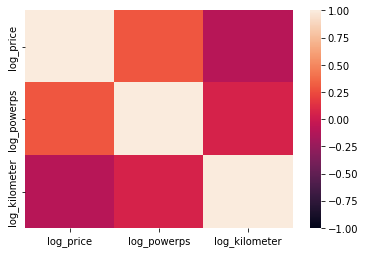

In [ ]:
# Import the modules
import seaborn as sns

# Heatmap visualization using correlation coeffs
sns.heatmap(data=data.loc[:, cont_log.keys()].corr(), vmin=-1, vmax=1)

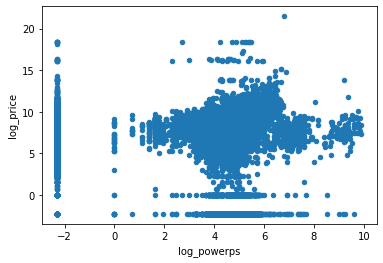

In [ ]:
# Scatter plot
data.plot.scatter(x="log_powerps", y="log_price")

In [ ]:
# Sampling statistics

# Declare sampling rates
samp_rates = [.01, .10, .25, .50, .75]

# Trace
print("Handling", end=" ")
# Iterate through the sampling rates
for rate in samp_rates:
    # Trace the progress
    print(rate, end=" ")
    # Sampling
    globals()[f"sample_mean_{rate}"] = pd.DataFrame(data={
        "price": [data.loc[:, "log_price"].sample(frac=rate).mean() for _ in range(1000)],
        "type": f"Mean of %{int(rate * 100)}"
    })

# Concat results
results = pd.concat([globals()[f"sample_mean_{rate}"] for rate in samp_rates])
# Trace
results.sample(n=5)

Handling 0.01 0.1 0.25 0.5 0.75 

,price,type
39,7.651966,Mean of %1
314,7.671434,Mean of %25
609,7.676936,Mean of %50
647,7.675873,Mean of %75
654,7.676275,Mean of %50


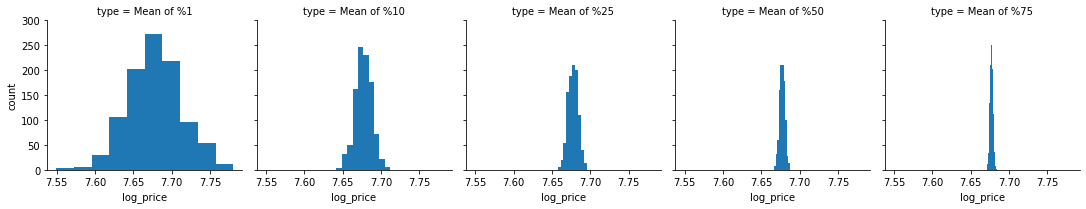

In [ ]:
# Visualize
g = sns.FacetGrid(results, col='type', col_wrap=5, ylim=(0, 300))
g.map(plt.hist, "price")
g.set_axis_labels(x_var="log_price", y_var="count")

In [ ]:
# Delete not needed objects
for rate in samp_rates:
    del globals()[f"sample_mean_{rate}"]

del results, g

In [ ]:
# Bootstrap Statistics

# Import the modules
from sklearn.utils import resample

# Declare a tracker list
results = list()
# Take a shorter sample to simulate bootstrapping
samp_data = data.sample(frac=.01, random_state=43)

# Iterate 1000 times
for t in range(1, 1001):
    # Resample
    sample = resample(samp_data.price)
    # Append the median
    results.append(sample.median())

# Convert it to a pandas series
results = pd.Series(data=results)
# Trace the results
d = pd.DataFrame(data={
    "original": data.price.median(),
    "bias": results.mean() - data.price.median(),
    "std_error": results.std()
    }, index=[0])
d

,original,bias,std_error
0,2950.0,-67.596,82.428984
